Ana denklem

l= w1.x1 + w2.x2 + b.1
* x: İnput
* w: Weight
* b: Bias
* l: Çizgiye göre konum


Gerekli kütüphaneleri ekleme

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Ana denklem doğrusunu çizen fonksiyon
* x1: İlk konum
* x2: Son konum

In [2]:
def ciz(x1, x2):
    cizgi = plt.plot(x1, x2)

Sigmoid fonksiyonu ile olasılık değerini hesaplama
* l: Çizgiye göre konum

In [3]:
def sigmoid(l):
    return 1 / (1 + np.exp(-l))

Cross Entropy yöntemi
* w: Ağırlıklar matriksi
* x: Girdiler (noktalar) matriksi
* y: Çıktılar matriksi

In [10]:
def hata_hesaplama(w, x, y):
    # Toplam nokta sayısı (1D yaparak bulabiliriz)
    m = y.shape[0]
    
    # Olasılık hesaplama (l = x * w)
    p = sigmoid(x * w)
    
    # Cross Entropy formülü
    # Matriks çarpımı olduğundan transpozunu alarak çarpılabilir hale sokuyoruz
    return -(1/m) * (np.log(p).T * y + np.log(1-p).T * (1-y))

Inputların matriksinin oluşturulması

x = | x1, x2, 1 |

In [5]:
# Nokta sayısı tanımlama
n_nokta = 7

# Noktarları oluşturma

# Her defasında aynı rastgele değerlerin atanamasını sağlar. 
# İnceleme işlemi için aynı değerler lazım
np.random.seed(0)

# x1 için dikey ters parabol oluşturma
rx1_ust = np.random.normal(10, 2, n_nokta)
rx1_alt = np.random.normal(5, 2, n_nokta)

# x2 için yatay ters parabol oluşturma
rx2_ust = np.random.normal(12, 2, n_nokta)
rx2_alt = np.random.normal(6, 2, n_nokta)

# Sabit değerin katsayısını oluşturma
bias = np.ones(n_nokta)

# İlk satır x, ikinci satır y verisi olur ([x,x], [y,y]). Matrix işlemleri yapmak için bize 
# ([x,y], [x, y]) tipinde veri lazım bu sebeple transpozunu alıyoruz.
ust_bolge = np.array([rx1_ust, rx2_ust, bias]).T
alt_bolge = np.array([rx1_alt, rx2_alt, bias]).T

# Vektorel olarak ekleme işlemi
x = np.vstack((ust_bolge, alt_bolge))

Katsayılar matriksinin oluşturulması

w = |w1| |w2| |b |

In [6]:
# Başlangıç değerleri (rastgeledir)
w1 = -0.2
w2 = -0.35
b = 3

# Matrix çarpımı yapmak için x1, x2, ve sabit verilerinin katsayıları
# Transpozunu almalıyız çünkü yatay veri ile dikey veri çarpılır
w = np.matrix([w1, w2, b]).T

# Çizginin başlangıç ve bitiş noktaları

# Sağ alt köşenin bulunması
p1 = np.array([alt_bolge[:, 0].min(), ust_bolge[:, 0].max()])
# Denklemde yer değiştirerek ikinci noktanın bulunması
p2 = - b / w2 + p1 * (-w1 / w2)

Outputları belirleme
* İlk olarak 0'lar, ikinci olarak 1'ler ekleniyor
* Bu verilere dikey olarak ihtiyacımız var

In [7]:
# reshape (satır, sütun)
y = np.array([np.zeros(n_nokta), np.ones(n_nokta)]).reshape(n_nokta * 2, 1)


Koordinat sistemine noktaların eklenmesi ve sistemin ekrana çizilmesi
* Kırmızı: 0 (false)
* Mavi: 1 (true)

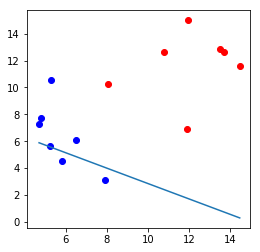

In [8]:
# Koordinat sistemi parçası oluşturma
# figsize (keyword): x,y uzunlukları
_, ax = plt.subplots(figsize=(4, 4))

# 0. ve 1. sütundaki her (:) satırı alma ve bu verileri koordinat sisteminde gösterme
# Kırmızılar: 0 (false) Maviler: 1 (true)
ax.scatter(ust_bolge[:, 0], ust_bolge[:, 1], color='r')
ax.scatter(alt_bolge[:, 0], alt_bolge[:, 1], color='b')

# Referans çizgisini çizme
ciz(p1, p2)

# Koordinat sistemini gösterme
plt.show()

In [11]:
hata_hesaplama(w, x, y)

matrix([[0.50371511]])